# ENSF 444 Project 

### Name: Manbir Briar and Victor Gouttin

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset: Breast Cancer Wisconsin (Diagnostic) from UC Irvine

In [51]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()

# Convert to pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add target column
df['target'] = data.target

# Display first few rows
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

## Dataprocessing:

In [52]:
X = df.drop('target', axis=1)
y = df['target']

print(f"Shape of X: {X.shape}, Type of X: {type(X)}")
print(f"Shape of y: {y.shape}, Type of y: {type(y)}")

print(f"Missing values in X: {X.isnull().sum().sum()}")
print(f"Missing values in y: {y.isnull().sum().sum()}")
print(df.dtypes)

Shape of X: (569, 30), Type of X: <class 'pandas.core.frame.DataFrame'>
Shape of y: (569,), Type of y: <class 'pandas.core.series.Series'>
Missing values in X: 0
Missing values in y: 0
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area

### Visualization

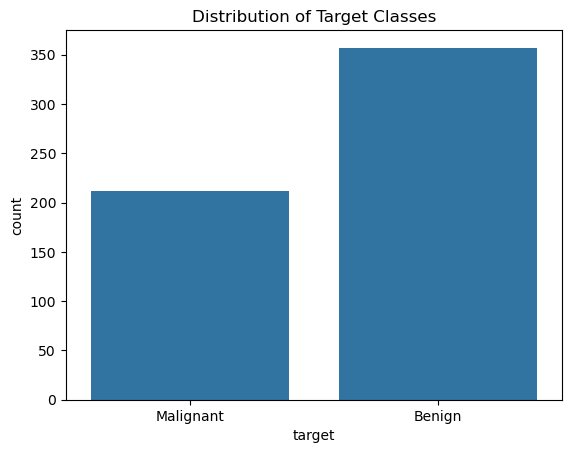

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y)
plt.title('Distribution of Target Classes')
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.show()

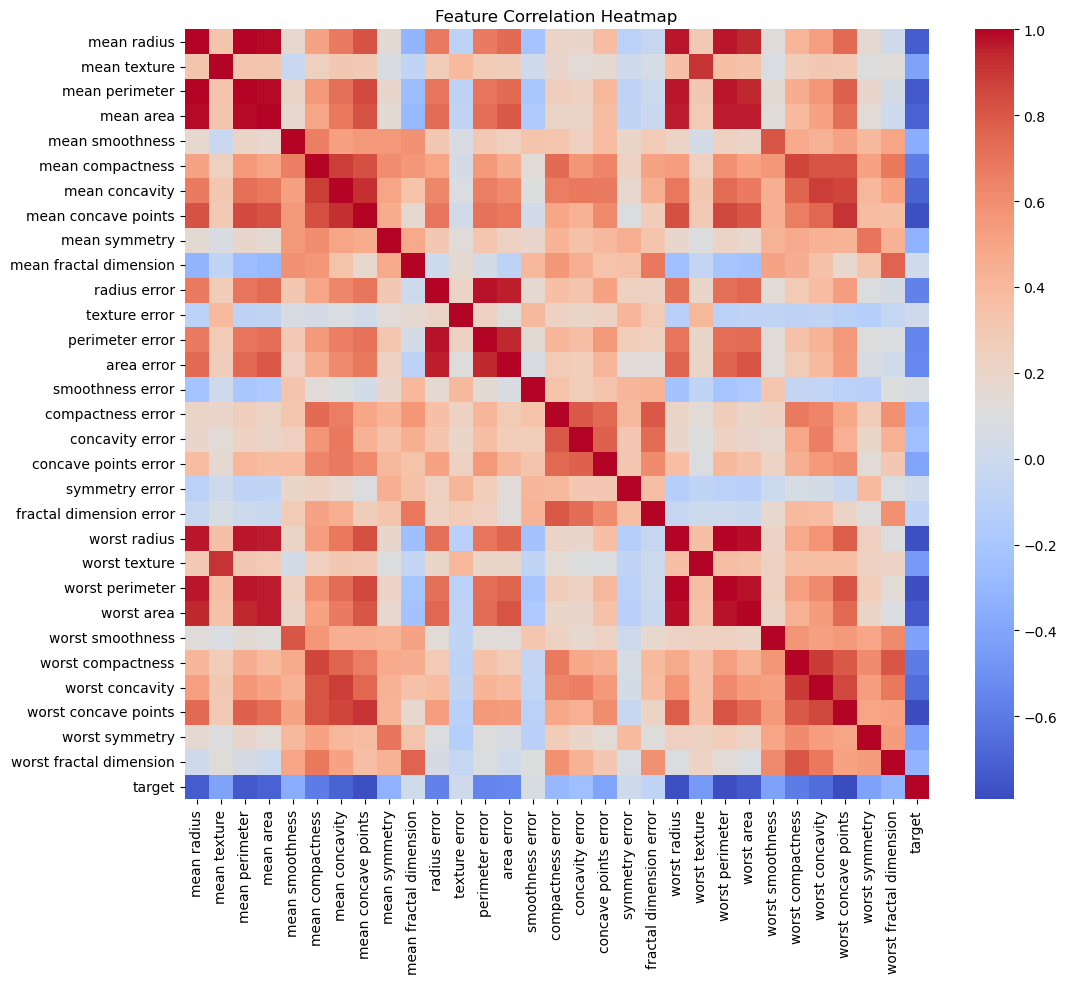

In [54]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


Top correlated features: ['worst concave points', 'worst perimeter', 'mean concave points']


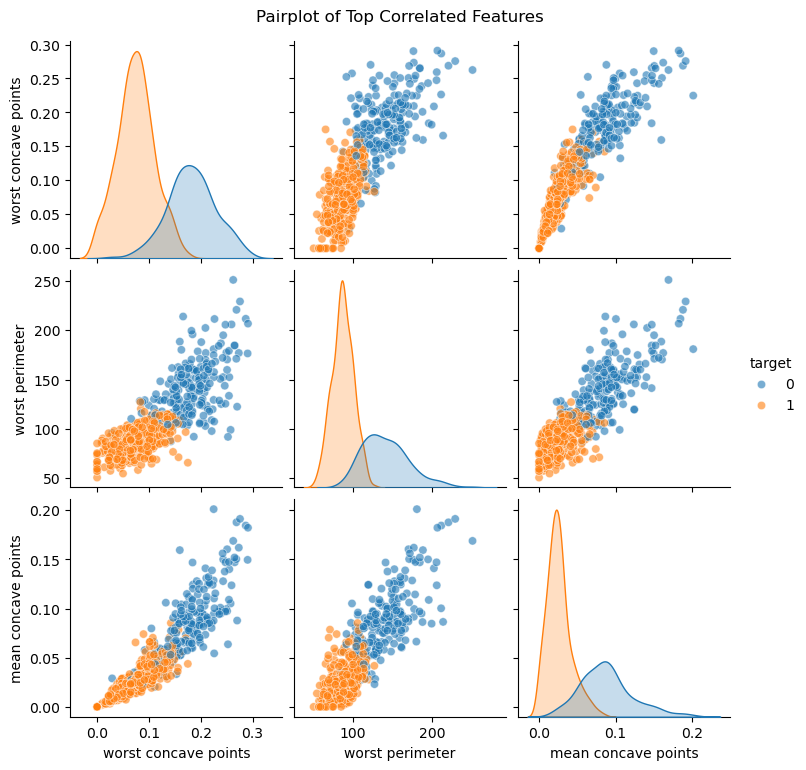

In [55]:
# Top 3 features most correlated with target
top_features = df.corr(numeric_only=True)['target'].abs().sort_values(ascending=False)[1:4].index.tolist()
print("Top correlated features:", top_features)
sns.pairplot(df[top_features + ['target']], hue='target', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Top Correlated Features', y=1.02)
plt.show()



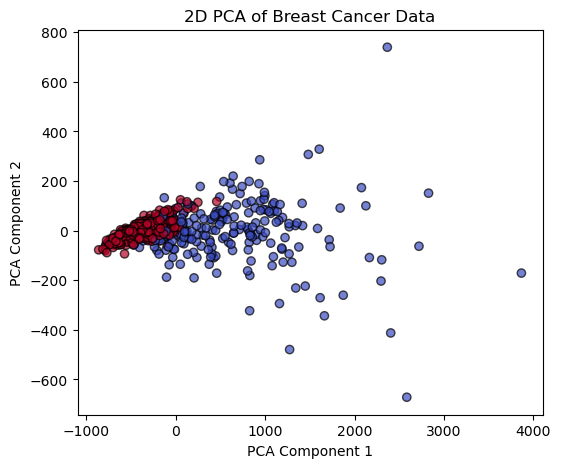

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA of Breast Cancer Data')
plt.show()


In [57]:
import numpy as np

# Compute correlation matrix
corr_matrix = df.drop('target', axis=1).corr().abs()

# Create mask to ignore duplicate pairs and self-correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.95
high_corr = [column for column in upper.columns if any(upper[column] > 0.95)]

print("Highly correlated features (correlation > 0.95):")
print(high_corr)


Highly correlated features (correlation > 0.95):
['mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst perimeter', 'worst area']


## ML Model #1: Logistic Regression

### Without Scaling:

Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.98      0.94      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
 [[46  1]
 [ 4 63]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


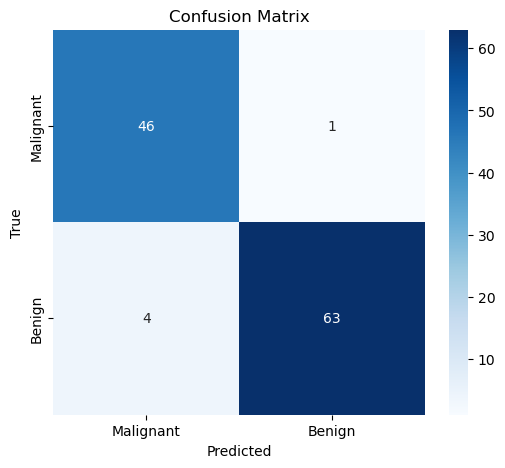

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### With Scaling:

Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
 [[45  2]
 [ 2 65]]


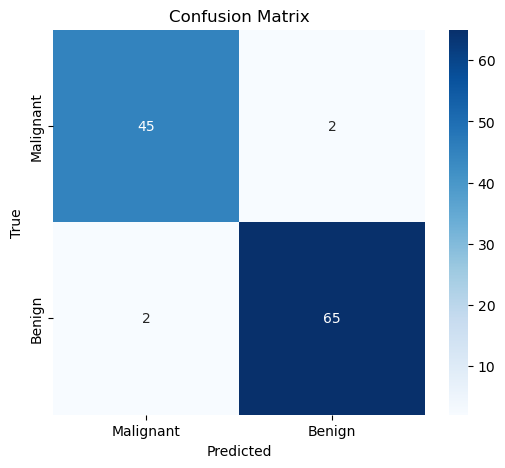

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [101]:
model.fit(X_train_scaled, y_train)
y_val_adjusted = (model.predict_proba(X_test_scaled)[:, 1] >= 0.3).astype(bool)
cm = confusion_matrix(y_test, y_val_adjusted)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [398, 455]

### Validation:

In [61]:
from sklearn.model_selection import cross_val_score
# Cross-validation on the training data
cv_scores = cross_val_score(LogisticRegression(max_iter=1000), X_train_scaled, y_train, cv=5)

# Print the results
#print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")


Mean cross-validation score: 0.9802197802197803


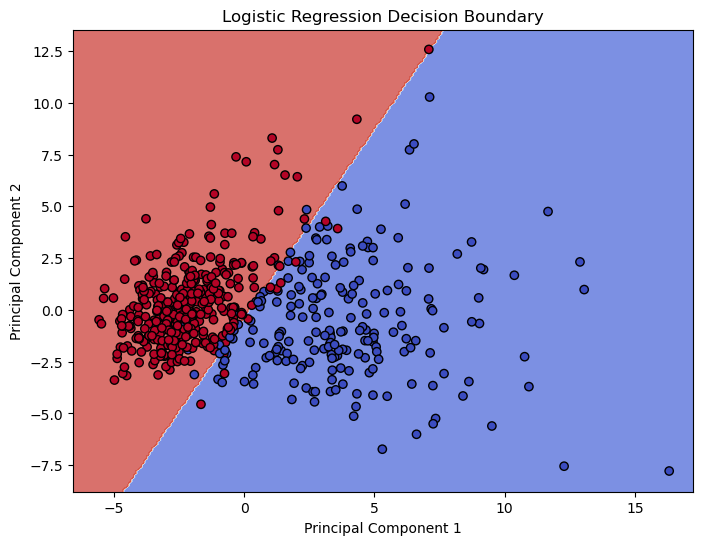

In [62]:
pca = PCA(n_components=2)
X_scaled = scaler.fit_transform(X)
X_pca = pca.fit_transform(X_scaled)  # Use X_scaled if you've scaled the data

# Fit Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_pca, y)  # Fit to the PCA-reduced data
# Generate grid of points to plot decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict probabilities for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


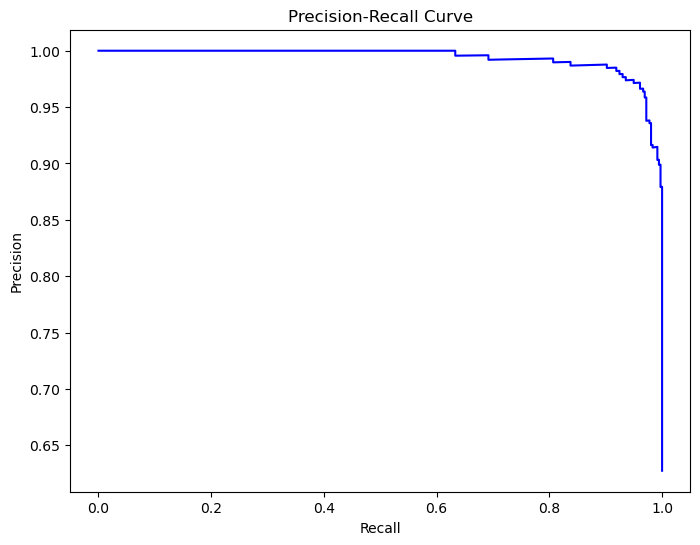

In [63]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities for class 1 (malignant) using the PCA-transformed data
y_pred_prob = model.predict_proba(X_pca)[:, 1]

# Compute precision and recall values
precision, recall, _ = precision_recall_curve(y, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()




In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with StandardScaler and RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling step
    ('rf', RandomForestClassifier(random_state=42))  # Random Forest classifier
])

# Define the hyperparameter grid for Random Forest with valid max_features options
param_grid = {
    'rf__n_estimators': [50, 100, 200, 500],  # Number of trees
    'rf__max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'rf__min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'rf__min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'rf__max_features': ['sqrt', 'log2', None],  # Valid options for max_features
    'rf__bootstrap': [True, False]  # Whether to use bootstrap sampling
}

# Re-run GridSearchCV with the corrected parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=0, scoring='accuracy')

# Fit the grid search model on the training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Best model (using the best hyperparameters)
best_rf_model = grid_search.best_estimator_

# Predict on the validation set
y_pred_best_rf = best_rf_model.predict(X_val)

# Calculate evaluation metrics for the best model
accuracy_best_rf = accuracy_score(y_val, y_pred_best_rf)
precision_best_rf = precision_score(y_val, y_pred_best_rf)
recall_best_rf = recall_score(y_val, y_pred_best_rf)
f1_best_rf = f1_score(y_val, y_pred_best_rf)

# Print the evaluation metrics
print(f"Evaluation for Best Random Forest Model:")
print(f"Accuracy: {accuracy_best_rf:.4f}")
print(f"Precision: {precision_best_rf:.4f}")
print(f"Recall: {recall_best_rf:.4f}")
print(f"F1 Score: {f1_best_rf:.4f}")


Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV] END rf__bootstrap=True, rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.1s
[CV] END rf__bootstrap=True, rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.1s
[CV] END rf__bootstrap=True, rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.1s
[CV] END rf__bootstrap=True, rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.1s
[CV] END rf__bootstrap=True, rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.1s
[CV] END rf__bootstrap=True, rf__max_depth=None, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_esti